# PHYS555 - Machine Learning Project

**Describe how SVM algorithms can be used for classification and regression problems (describe the algorithms). Which parameters are the most important ones in the models for classification and regression (e.g., for fitting and controlling overfitting...)? What is the difference between classification and regression algorithms in SVM?**

Karlee Zammit - V00823093

# Introduction

In this notebook, I will discuss what a support vector machine (SVM) is, how the algorithm works, parameters to avoid overfitting, and the difference between the classification and regression SVM algorithms. 

# Support Vector Machine 

A SVM is a supervised learning model (or decision machine) that analyzes data for classification and regression tasks. At a high level, the SVM algorithm maximizes a particular mathematical function with respect to a given collection of data. As discussed in Bishop, C. M. (2006)., an important property of SVM is that any local solution is also a global optimum. 

Before diving into the math behind the algorithm and the algorithm itself, I present four key concepts. As discussed in Noble, W. (2006), there are four concepts essential in the SVM algorithm: 

1. The separating hyperplane

2. The maximum-margin hyperplane

3. The soft margin 

4. The kernel function

I will discuss these below for a binary classification example with linear SVM. Multiclass classification can be performed if a "one vs rest" approach is taken with the data.

### The Separating Hyperplane


For an imaginary dataset, that looks like the left panel of the Figure below (titled "2D Hyperplane"), a separating line can be drawn through the data. Then for a future prediction, depending on where the prediction falls on the graph, a classification can be made if it will belong to the purple or orange class. This separating line is called the separating hyperplane. This idea can be extended to higher dimensions, with a 3-dimensional example provided in the right panel of the Figure below (titled "3D Hyperplane).


<div>
<img src="SVM-hyperplanes.png" width="500"/>
</div>

### The Maximum-Margin Hyperplane

In a 1D example as shown in the Figure below, the "maximum-margin" hyperplane is located at the position in space that maximizes it's distance from each of the two classes. If you were to move this margin closer to one class, it would no longer be the maximum distance away and therefore would have a higher chance of inaccurately predicting a future observation of each class. For perfect data like in the Figure below, the maximum-margin hyperplane can be used to determine the optimized hyperplane location.

<div>
<img src="SVM-margin-max.png" width="400"/>
</div>

But what if the data was not easily linearly separatable, as shown in the Figure below? It would then be ideal to allow for misclassifications, so that future observations can be more accurately predicted (ie. avoid overfitting to the data). This is an example of the tradeoff between bias and variance, which is a common theme in machine learning algorithms. The location of this soft margin is determined by trial and error using cross validation. 

<div>
<img src="SVM-margin-soft.png" width="350"/>
</div>

### The Kernel Function

Sometimes data is too complex to be overcome by the introduction of a soft margin alone. For example, in the top panel of the Figure below, there exists no linear line that could separate the two classes from one another. The kernel function provides a solution to the problem, adding an additional dimension to the data. In this example, by squaring the original values, a new dimension is introduced and a linear line can then be used to separate the classes from one another. It can be proven that for any given labelled data set, there exists a kernel function that allows the data to be linearly separated. One needs to consider the curse of dimensionality here, as complex data can be projected into higher and higher dimensions, but the number of possible solutions increases exponentially. 

<div>
<img src="SVM-kernel.png" width="400"/>
</div>

### The Algorithm 

For any data set, there may be multiple hyperplanes that exist that can separate the data. Support vectors are data points that are close to the hyperplane and influence the position and orientation of the hyperplane. A variety of parameters are important in fine-tuning the optimized hyperplane, and these are discussed below in the "Avoiding Overfitting" section.

For classification, SVM finds the optimal hyperplane solution by maximizing the distance between the two classes (allowing for a soft boundary when necessary). 

For regression, SVM finds the optimal hyperplane, allowing for data points at a distance epsilon away from the hyperplane to be included with no increased error. 

<div>
<img src="SVM.png" width="600"/>
</div>

## Avoiding Overfitting

For SVC, the most important parameters for avoiding overfitting are "C" and "Gamma". For SVR, the most important parameters are "C", "Gamma", and "Epsilon". 

### C (Regularization Parameter)

C adds a penalty for each misclassified data point, meaning it tells the SVM optimization how much you want to avoid misclassifying each training example. If C is small, there is a small penalty for misclassified points, and so the decision boundary with a large margin is chosen at the expense of many misclassified points. If C is large, SVM tries to minimize the number of misclassified examples, which results in a decision boundary with a smaller margin. If C is too large, this can cause overfitting.

<div>
<img src="C-corr.png" width="600"/>
</div>

### Gamma (Kernel Coefficient) 

Gamma controls the distance of the influence of a single training point. Low values of gamma result in a large similarity radius, and so more points are grouped together. High values of gamma mean that less points need to be grouped together in order to be considered in the same group or class. Large gamma values tend to lead to overfitting. 

<div>
<img src="Untitled_Artwork (6).png" width="600"/>
</div>


### Epsilon (for Regression Only) 

The below figure from Chapter 7 of Bishop, C. M. (2006). provides an excellent summary of epsilon.

<div>
<img src="fig77.png" width="600"/>
</div>

The error for points within the epsilon away from the optimal hyperplane is disregarded. Another name for this is called the "epsilon insensitive tube". 

### Math Behind the Algorithm (Bishop, C. M. (2006) Summary)

Chapter 7 of Bishop, C. M. (2006) provides an excellent explanation of the SVM algorithm, of which I provide a brief summary below.

For a linear function of the form 
<div>
<img src="gen-form.png" width="200"/>
</div>

where w are the polynomial coefficients, φ is a fixed feature-space transformation, and b is an explicit bias.

SVM solves the optimization problem: 

<div>
<img src="opt.png" width="150"/>
</div>

through the use of Lagrange multipliers. 

We introduce a slack variable ξ, which allows data points to be on the "wrong side" of the margin boundary, with a penalty that increases with distance from that boundary. 

For **classification**, to maximize the margin while applying a penalty to points that lie on the wrong side of the margin, we minimize 

<div>
<img src="class-min.png" width="200"/>
</div>

where C>0, and controls the trade-off between the slack variable penalty and the margin. 

For **regression**, using Langrage multipliers, the error function 

<div>
<img src="err-regression.png" width="250"/>
</div>

is minimized, where ξ-hat is introduced by the epsilon-tube described in the above section.


### Summary: 

The two goals of SVM for classification are: 
- Increase the distance of decision boundary to classes (or support vectors)
- Maximize the number of points that are correctly classified in the training set

The goal of SVM for regression is to determine an optimal hyperplane and epsilon-tube containing the maximum number of points from the data. 


# Classification

In this section, I will compare the performance of an ANN (artificial neural network) and SVM (discussed in previous question), with the target of predicting what type of forest covers a specific area. I will be using the "Covertype", obtained from the UCI machine learning repository. The "Covertype" dataset is a large dataset, with 54 attributes and 581012 instances. There are 7 different classes within this dataset. It has been used in multiple papers (links available on the UCI website, linked in the references below) to compare the performance of multiple ANNs. 

This dataset is imbalanced, meaning that there are more samples of class 1 and 2 than the other classes. To balance the data, I use undersampling, chosen instead of other resampling methods due to the time constraints of this project and computational power available. 

This notebook goes as follow: 
1. Load and present the data
2. Undersampling and data visualization
3. Optimize a ANN network, and calculate the associated performance metrics and plots
4. Optimized a SVC (support vector classifier) algorithm, and calculate the associated performance metrics and plots. 
5. A comparison of the two algorithms 

In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from tabulate import tabulate
from sklearn.svm import SVR
from collections import Counter  

## Functions

In [2]:
# Confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.viridis):
    
    #cmap=plt.cm.Blues
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
def plot_ROC_curve(va_prob, Y_va, title):
# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(7):
        fpr[i], tpr[i], _ = roc_curve(Y_va[:, i], va_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_va.ravel(), va_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(7):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(str(title))
    plt.legend(loc="lower right")
    plt.show()

## Load the data

In [3]:
# Load in data and print out a few rows, as well as the shape of the data
df = pd.read_csv('covtype.csv')
print('The shape of the dataset is ' + str(df.shape))

# print the first few columns of the dataframe
df.head()

The shape of the dataset is (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Looking at the above data, there is both binary and continuous data. For practice, I will use OneHot encoding for the cover type variable, even though it is already in numerical format.

In [4]:
# Assign "cover type" as the target variable 
X = df.drop(["Cover_Type"], axis=1).values
y = df["Cover_Type"].values

# Print the number of samples within each class in the unaltered data
print('Original dataset shape %s' % Counter(y))  

Original dataset shape Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


As you can see, this is an imbalanced data set, where classes 1 and 2 have thousands more samples than the other classes. To avoid this issue (ie. ANN having bias towards predicting one class better than another), I have chosen to resample the data and use this sampled data going forward. There are many different ways to resample data, with some good options being KNN condensed neighbours to determine which samples to keep. For the sake of this assignment, I will use random undersampling as this dataset is quite large and my computing power is limited. 

## Data Visualization
Below are histograms of each continuous variable within the data set.

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>],
       [<AxesSubplot:title={'center':'Hillshade_9am'}>,
        <AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:title={'center':'Cover_Type'}>, <AxesSubplot:>]],
      dtype=object)

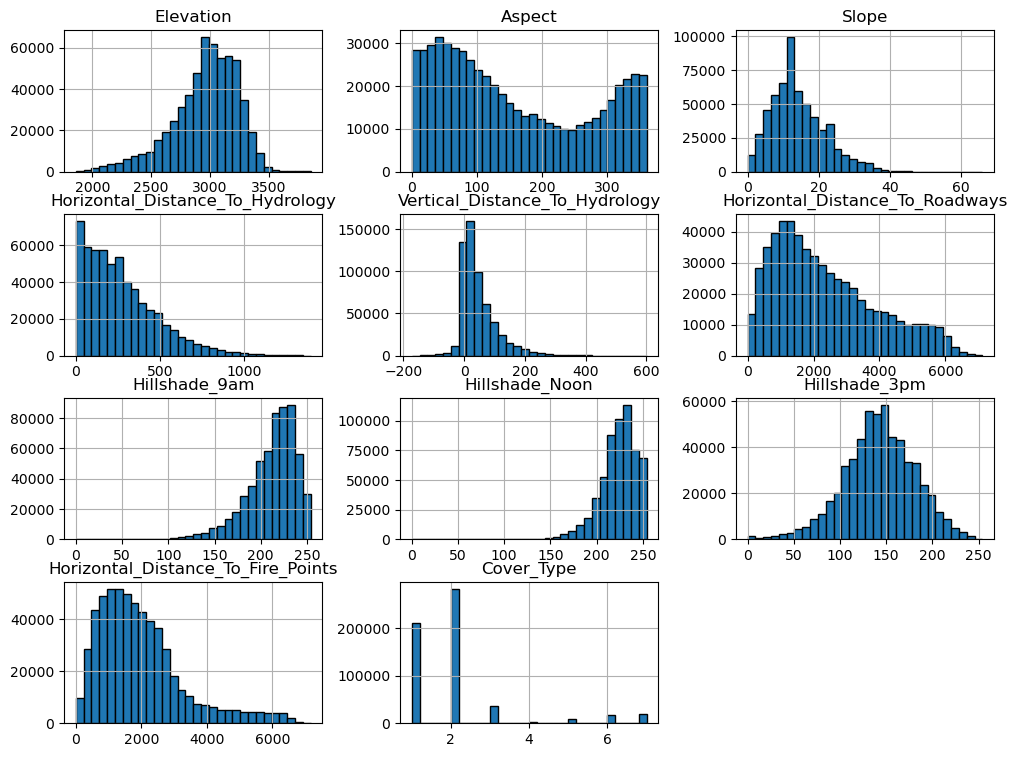

In [5]:
# Plot a histogram of the continuous variables, and the target variable
df_cont = df.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], axis=1)

# Plot histogram of all continuous variable
df_cont.hist(figsize=(12, 9), bins=30, edgecolor="black")

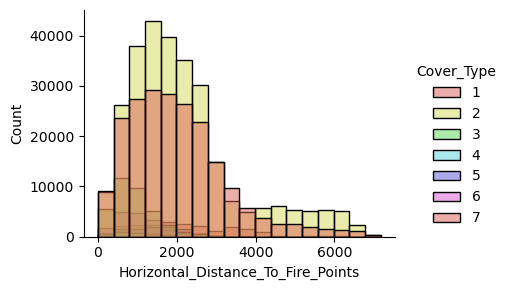

In [6]:
# Out of interest, let's plot a histogram of variables that aren't intuitive to relate to each other
sns.displot(data=df, x='Horizontal_Distance_To_Fire_Points', bins=18,
            height=3, aspect=1.4, hue='Cover_Type',
            palette='hls')

## ANN and SVM Runs

In [7]:
### ANN PIPELINE ###

# From previous pipelines: activation, solver, validation fraction, learning rate, hidden layer sizes 
# these were the best parameters before I tested alpha and tolerance

#ann_pipeline = Pipeline([('ANNcls', MLPClassifier(early_stopping=True, n_iter_no_change=5, max_iter=500,
#                                                  learning_rate='adaptive', solver='sgd', validation_fraction=0.1,
#                                                 hidden_layer_sizes=(20,50,20), activation='relu'))])
            
#params = [{'ANNcls__alpha':[1, 0.1, 0.01, 0.001], 'ANNcls__tol':[0.0001, 0.001, 0.01, 0.1]}]

#gs_ann = GridSearchCV(ann_pipeline,
#                      param_grid=params,
#                      scoring='accuracy',
#                      cv=10)

#gs_ann.fit(X_tr_Norm, Y_tr)

#gs_ann.best_params_

### SVM PIPELINE ###

#\sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

#svm_pipeline = Pipeline([('PCA', PCA()), ('svc', SVC(decision_function_shape = 'ovr'))])
            
#params = [{'PCA__n_components':[.7, .9, .999], 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'svc__gamma':['scale', 'auto'], 'svc__degree':[2, 3, 4]}]

#gs_svm = GridSearchCV(svm_pipeline,
#                      param_grid=params,
#                      scoring='accuracy',
#                      cv=5)

#gs_svm.fit(X_tr_Norm, Y_tr.argmax(axis=1))

#gs_svm.best_params_

Starting iteration 1
Undersampling the data
Splitting the data
Normalizing the data
Running the optimized ANN
Running the optimized SVM
Plotting ROC Curves for Iteration 1


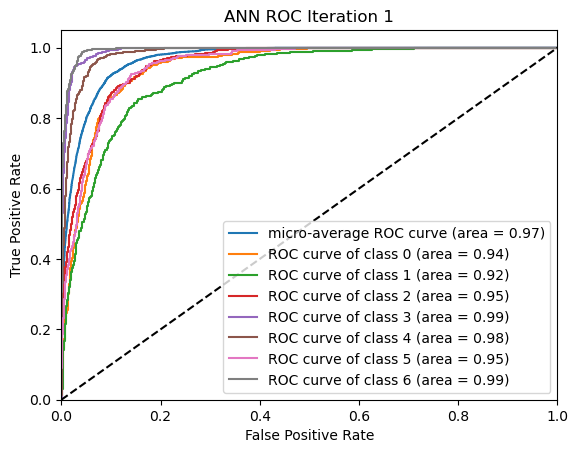

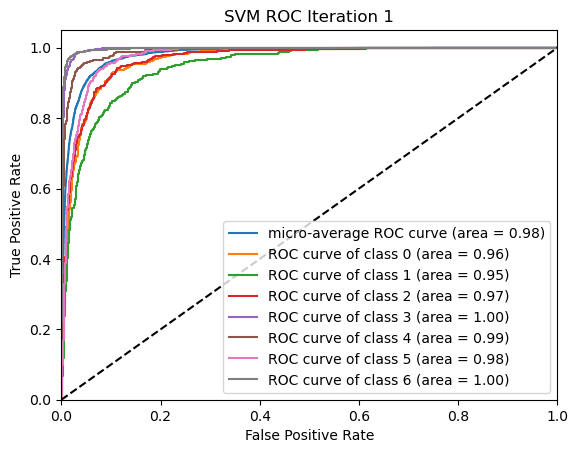

Done iteration 1, woohoo!
Starting iteration 2
Undersampling the data
Splitting the data
Normalizing the data
Running the optimized ANN
Running the optimized SVM
Plotting ROC Curves for Iteration 2


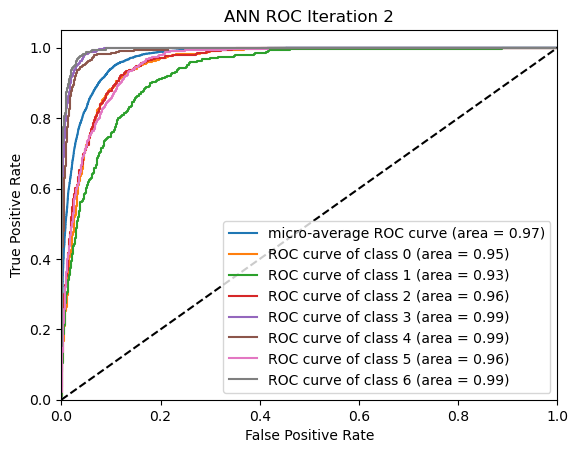

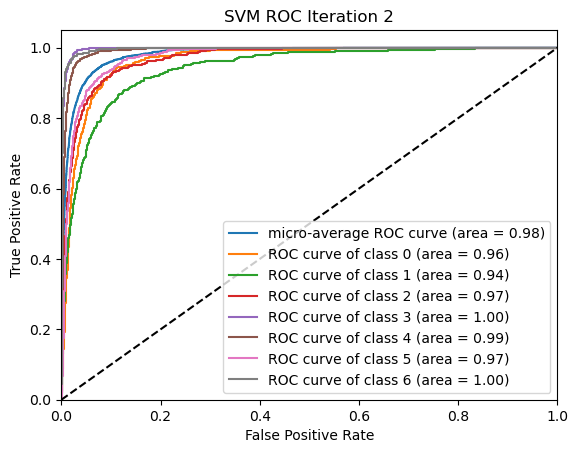

Done iteration 2, woohoo!


In [8]:
# Randomly undersample the data such that each class has the same samples as the minimum class
n_iter = 2

class_report_ann = []
cnf_matrix_ANN_tr = []
cnf_matrix_ANN_va = []

class_report_svm = []
cnf_matrix_SVM_tr = []
cnf_matrix_SVM_va = []


for ii in range(n_iter):
    
    print('Starting iteration ' + str(ii+1))
    
    print('Undersampling the data')
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    #print('Resampled dataset shape %s' % Counter(y_res))

    # Practice using OneHotEncoder, although this is not necessary for this data set.
    ohe = OneHotEncoder(sparse=False)
    tar= np.reshape(y_res,(-1,1))
    tar = ohe.fit_transform(tar)
    
    print('Splitting the data')
    # Split the data into training and validation, with 20% of the data for validation. 
    #X_tr, X_va, Y_tr, Y_va = train_test_split(X_res, tar, test_size=0.20, random_state=42)
    X_tr, X_va, Y_tr, Y_va = train_test_split(X_res, tar, test_size=0.20)
    #print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
    
    print('Normalizing the data')
    # Normalize the data using the StandardScaler function, ie. center the mean of the data around 0. 
    scaler_S= StandardScaler().fit(X_tr)  # line #2
    X_tr_Norm= scaler_S.transform(X_tr) # line # 3
    X_va_Norm= scaler_S.transform(X_va)  # Line #4
    
    if n_iter == 0:
        print('Plot of Normalized vs Not Normalized Data')
        fig = plt.figure(figsize=(11, 9))
        n_col = 1
        title = 'Aspect'
        plt.subplot(2, 2, 1)
        plt.hist(X_tr[:,n_col], edgecolor='black')
        plt.title('Training set: Not Normalized')
        plt.ylabel('N')
        plt.xlabel(str(title))
        plt.subplot(2, 2, 2)
        plt.hist(X_va[:,n_col], edgecolor='black')
        plt.title('Validation set: Not Normalized')
        plt.ylabel('N')
        plt.xlabel(str(title))       
        plt.subplot(2, 2, 3)
        plt.hist(X_tr_Norm[:,n_col], edgecolor='black')
        plt.title('Training set: Normalized')
        plt.ylabel('N')
        plt.xlabel(str(title))
        plt.subplot(2, 2, 4)
        plt.hist(X_va_Norm[:,n_col], edgecolor='black')
        plt.title('Validation set: Normalized')
        plt.ylabel('N')
        plt.xlabel(str(title))  
        plt.show()
        
        # Plot a histogram of the balanced cover types 
        fig = plt.figure(figsize=(5, 3))
        plt.hist(y_res, color='orange', edgecolor='black') 
        plt.ylabel('N')
        plt.xlabel('Cover Type')
        plt.title('Balanced Cover Types')
        plt.show()

    
    # ANN: 
    print('Running the optimized ANN')
    # Create the ANN model with fine-tuned parameters 
    clf_ANN = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20,50,20), 
                            max_iter=500, early_stopping=True, n_iter_no_change=5, 
                            validation_fraction=0.1, learning_rate='adaptive', random_state=42, alpha=0.1, tol=0.0001)

    ## fitting the model:
    clf_ANN.fit(X_tr_Norm, Y_tr)

    ## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
    ANN_tr_prob = clf_ANN.predict_proba(X_tr_Norm)
    ANN_tr_pred = clf_ANN.predict(X_tr_Norm)

    ANN_va_prob = clf_ANN.predict_proba(X_va_Norm)
    
    # same thing as grid prediction
    ANN_va_pred = clf_ANN.predict(X_va_Norm)
    
    class_report_ann.append(classification_report(Y_va.argmax(axis=1), ANN_va_pred.argmax(axis=1), output_dict=True))
    cnf_matrix_ANN_tr.append(confusion_matrix(ANN_tr_pred.argmax(axis=1), Y_tr.argmax(axis=1)))
    cnf_matrix_ANN_va.append(confusion_matrix(ANN_va_pred.argmax(axis=1), Y_va.argmax(axis=1)))
    
    # SVM: 
    print('Running the optimized SVM')
    # Initialize the fine-tuned model
    clf_svm = SVC(decision_function_shape='ovr', kernel='rbf', gamma=0.1, C=5, tol=1, probability=True, break_ties=True)

    # Fit the model on the data 
    clf_svm.fit(X_tr_Norm, Y_tr.argmax(axis=1))
    
    # Using those parameters, determine the training and validation predictions
    SVM_tr_prob = clf_svm.predict_proba(X_tr_Norm)
    SVM_tr_pred = clf_svm.predict(X_tr_Norm)

    SVM_va_prob = clf_svm.predict_proba(X_va_Norm)
    SVM_va_pred = clf_svm.predict(X_va_Norm)
    
    class_report_svm.append(classification_report(Y_va.argmax(axis=1), SVM_va_pred, output_dict=True))
    cnf_matrix_SVM_tr.append(confusion_matrix(SVM_tr_pred, Y_tr.argmax(axis=1)))
    cnf_matrix_SVM_va.append(confusion_matrix(SVM_va_pred, Y_va.argmax(axis=1)))
    
    print('Plotting ROC Curves for Iteration ' + str(ii+1))
    plot_ROC_curve(ANN_va_prob, Y_va, title='ANN ROC Iteration ' + str(ii+1))
    plot_ROC_curve(SVM_va_prob, Y_va, title='SVM ROC Iteration ' + str(ii+1))
    
    print('Done iteration ' + str(ii+1) + ', woohoo!')

### Background Calculations

In [9]:
# Calculate ANN results with error 
class0_p_ann = []
class1_p_ann = []
class2_p_ann = []
class3_p_ann = []
class4_p_ann = []
class5_p_ann = []
class6_p_ann = []

class0_r_ann = []
class1_r_ann = []
class2_r_ann = []
class3_r_ann = []
class4_r_ann = []
class5_r_ann = []
class6_r_ann = []

class0_f_ann = []
class1_f_ann = []
class2_f_ann = []
class3_f_ann = []
class4_f_ann = []
class5_f_ann = []
class6_f_ann = []

accuracy_all_ann = []

n_class = 7
for ii in range(0, n_iter):
    for ii_2 in range(0, n_class):
        if ii_2 == 0:
            class0_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class0_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class0_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 1: 
            class1_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class1_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class1_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 2: 
            class2_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class2_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class2_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 3: 
            class3_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class3_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class3_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 4: 
            class4_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class4_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class4_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 5: 
            class5_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class5_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class5_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 6: 
            class6_p_ann.append(class_report_ann[ii-1][str(ii_2)]['precision'])
            class6_r_ann.append(class_report_ann[ii-1][str(ii_2)]['recall'])
            class6_f_ann.append(class_report_ann[ii-1][str(ii_2)]['f1-score'])

    accuracy_all_ann.append(class_report_ann[ii]['accuracy'])  

print(accuracy_all_ann)

# Calculate svm results with error 

class0_p_svm = []
class1_p_svm = []
class2_p_svm = []
class3_p_svm = []
class4_p_svm = []
class5_p_svm = []
class6_p_svm = []

class0_r_svm = []
class1_r_svm = []
class2_r_svm = []
class3_r_svm = []
class4_r_svm = []
class5_r_svm = []
class6_r_svm = []

class0_f_svm = []
class1_f_svm = []
class2_f_svm = []
class3_f_svm = []
class4_f_svm = []
class5_f_svm = []
class6_f_svm = []

accuracy_all_svm = []

n_class = 7
for ii in range(0, n_iter):
    for ii_2 in range(0, n_class):
        if ii_2 == 0:
            class0_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class0_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class0_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 1: 
            class1_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class1_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class1_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 2: 
            class2_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class2_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class2_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 3: 
            class3_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class3_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class3_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 4: 
            class4_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class4_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class4_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 5: 
            class5_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class5_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class5_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
        if ii_2 == 6: 
            class6_p_svm.append(class_report_svm[ii-1][str(ii_2)]['precision'])
            class6_r_svm.append(class_report_svm[ii-1][str(ii_2)]['recall'])
            class6_f_svm.append(class_report_svm[ii-1][str(ii_2)]['f1-score'])
            
    accuracy_all_svm.append(class_report_svm[ii]['accuracy'])

print(accuracy_all_svm)

class0_p_svm_avg = np.mean(class0_p_svm)
class0_p_svm_std = np.std(class0_p_svm)
class1_p_svm_avg = np.mean(class1_p_svm)
class1_p_svm_std = np.std(class1_p_svm)
class2_p_svm_avg = np.mean(class2_p_svm)
class2_p_svm_std = np.std(class2_p_svm)
class3_p_svm_avg = np.mean(class3_p_svm)
class3_p_svm_std = np.std(class3_p_svm)
class4_p_svm_avg = np.mean(class4_p_svm)
class4_p_svm_std = np.std(class4_p_svm)
class5_p_svm_avg = np.mean(class5_p_svm)
class5_p_svm_std = np.std(class5_p_svm)
class6_p_svm_avg = np.mean(class6_p_svm)
class6_p_svm_std = np.std(class6_p_svm)
class0_p_ann_avg = np.mean(class0_p_ann)
class0_p_ann_std = np.std(class0_p_ann)
class1_p_ann_avg = np.mean(class1_p_ann)
class1_p_ann_std = np.std(class1_p_ann)
class2_p_ann_avg = np.mean(class2_p_ann)
class2_p_ann_std = np.std(class2_p_ann)
class3_p_ann_avg = np.mean(class3_p_ann)
class3_p_ann_std = np.std(class3_p_ann)
class4_p_ann_avg = np.mean(class4_p_ann)
class4_p_ann_std = np.std(class4_p_ann)
class5_p_ann_avg = np.mean(class5_p_ann)
class5_p_ann_std = np.std(class5_p_ann)
class6_p_ann_avg = np.mean(class6_p_ann)
class6_p_ann_std = np.std(class6_p_ann)
class0_p_svm_avg = np.mean(class0_p_svm)
class0_p_svm_std = np.std(class0_p_svm)
class1_p_svm_avg = np.mean(class1_p_svm)
class1_p_svm_std = np.std(class1_p_svm)
class2_p_svm_avg = np.mean(class2_p_svm)
class2_p_svm_std = np.std(class2_p_svm)
class3_p_svm_avg = np.mean(class3_p_svm)
class3_p_svm_std = np.std(class3_p_svm)
class4_p_svm_avg = np.mean(class4_p_svm)
class4_p_svm_std = np.std(class4_p_svm)
class5_p_svm_avg = np.mean(class5_p_svm)
class5_p_svm_std = np.std(class5_p_svm)
class6_p_svm_avg = np.mean(class6_p_svm)
class6_p_svm_std = np.std(class6_p_svm)
class0_r_ann_avg = np.mean(class0_r_ann)
class0_r_ann_std = np.std(class0_r_ann)
class1_r_ann_avg = np.mean(class1_r_ann)
class1_r_ann_std = np.std(class1_r_ann)
class2_r_ann_avg = np.mean(class2_r_ann)
class2_r_ann_std = np.std(class2_r_ann)
class3_r_ann_avg = np.mean(class3_r_ann)
class3_r_ann_std = np.std(class3_r_ann)
class4_r_ann_avg = np.mean(class4_r_ann)
class4_r_ann_std = np.std(class4_r_ann)
class5_r_ann_avg = np.mean(class5_r_ann)
class5_r_ann_std = np.std(class5_r_ann)
class6_r_ann_avg = np.mean(class6_r_ann)
class6_r_ann_std = np.std(class6_r_ann)
class0_r_svm_avg = np.mean(class0_r_svm)
class0_r_svm_std = np.std(class0_r_svm)
class1_r_svm_avg = np.mean(class1_r_svm)
class1_r_svm_std = np.std(class1_r_svm)
class2_r_svm_avg = np.mean(class2_r_svm)
class2_r_svm_std = np.std(class2_r_svm)
class3_r_svm_avg = np.mean(class3_r_svm)
class3_r_svm_std = np.std(class3_r_svm)
class4_r_svm_avg = np.mean(class4_r_svm)
class4_r_svm_std = np.std(class4_r_svm)
class5_r_svm_avg = np.mean(class5_r_svm)
class5_r_svm_std = np.std(class5_r_svm)
class6_r_svm_avg = np.mean(class6_r_svm)
class6_r_svm_std = np.std(class6_r_svm)
class0_f_ann_avg = np.mean(class0_f_ann)
class0_f_ann_std = np.std(class0_f_ann)
class1_f_ann_avg = np.mean(class1_f_ann)
class1_f_ann_std = np.std(class1_f_ann)
class2_f_ann_avg = np.mean(class2_f_ann)
class2_f_ann_std = np.std(class2_f_ann)
class3_f_ann_avg = np.mean(class3_f_ann)
class3_f_ann_std = np.std(class3_f_ann)
class4_f_ann_avg = np.mean(class4_f_ann)
class4_f_ann_std = np.std(class4_f_ann)
class5_f_ann_avg = np.mean(class5_f_ann)
class5_f_ann_std = np.std(class5_f_ann)
class6_f_ann_avg = np.mean(class6_f_ann)
class6_f_ann_std = np.std(class6_f_ann)
class0_f_svm_avg = np.mean(class0_f_svm)
class0_f_svm_std = np.std(class0_f_svm)
class1_f_svm_avg = np.mean(class1_f_svm)
class1_f_svm_std = np.std(class1_f_svm)
class2_f_svm_avg = np.mean(class2_f_svm)
class2_f_svm_std = np.std(class2_f_svm)
class3_f_svm_avg = np.mean(class3_f_svm)
class3_f_svm_std = np.std(class3_f_svm)
class4_f_svm_avg = np.mean(class4_f_svm)
class4_f_svm_std = np.std(class4_f_svm)
class5_f_svm_avg = np.mean(class5_f_svm)
class5_f_svm_std = np.std(class5_f_svm)
class6_f_svm_avg = np.mean(class6_f_svm)
class6_f_svm_std = np.std(class6_f_svm)
accuracy_all_ann_avg = np.mean(accuracy_all_ann)
accuracy_all_ann_std = np.std(accuracy_all_ann)
accuracy_all_svm_avg = np.mean(accuracy_all_svm)
accuracy_all_svm_std = np.std(accuracy_all_svm)

#create data
data = [["1", class0_p_ann_avg, class0_p_ann_std, class0_r_ann_avg, class0_r_ann_std, class0_f_ann_avg, class0_f_ann_std], 
        ["2", class1_p_ann_avg, class1_p_ann_std, class1_r_ann_avg, class1_r_ann_std, class1_f_ann_avg, class1_f_ann_std],
       ["3", class2_p_ann_avg, class2_p_ann_std, class2_r_ann_avg, class2_r_ann_std, class2_f_ann_avg, class2_f_ann_std],
       ["4", class3_p_ann_avg, class3_p_ann_std, class3_r_ann_avg, class3_r_ann_std, class3_f_ann_avg, class3_f_ann_std],
       ["5", class4_p_ann_avg, class4_p_ann_std, class4_r_ann_avg, class4_r_ann_std, class4_f_ann_avg, class4_f_ann_std],
       ["6", class5_p_ann_avg, class5_p_ann_std, class5_r_ann_avg, class5_r_ann_std, class5_f_ann_avg, class1_f_ann_std],
       ["7", class6_p_ann_avg, class6_p_ann_std, class6_r_ann_avg, class6_r_ann_std, class6_f_ann_avg, class6_f_ann_std]]

#define header names
col_names = ["Class", "Precision", "Std Precision", "Recall", "Std Recall", "F1", "Std F1"]

#create data
data_svm = [["1", class0_p_svm_avg, class0_p_svm_std, class0_r_svm_avg, class0_r_svm_std, class0_f_svm_avg, class0_f_svm_std], 
        ["2", class1_p_svm_avg, class1_p_svm_std, class1_r_svm_avg, class1_r_svm_std, class1_f_svm_avg, class1_f_svm_std],
       ["3", class2_p_svm_avg, class2_p_svm_std, class2_r_svm_avg, class2_r_svm_std, class2_f_svm_avg, class2_f_svm_std],
       ["4", class3_p_svm_avg, class3_p_svm_std, class3_r_svm_avg, class3_r_svm_std, class3_f_svm_avg, class3_f_svm_std],
       ["5", class4_p_svm_avg, class4_p_svm_std, class4_r_svm_avg, class4_r_svm_std, class4_f_svm_avg, class4_f_svm_std],
       ["6", class5_p_svm_avg, class5_p_svm_std, class5_r_svm_avg, class5_r_svm_std, class5_f_svm_avg, class1_f_svm_std],
       ["7", class6_p_svm_avg, class6_p_svm_std, class6_r_svm_avg, class6_r_svm_std, class6_f_svm_avg, class6_f_svm_std]]
  
#define header names
col_names_svm = ["Class", "Precision", "Std Precision", "Recall", "Std Recall", "F1", "Std F1"]

all_conf_ANN_tr = cnf_matrix_ANN_tr[0]
for conf in range(1,n_iter): 
    all_conf_ANN_tr += cnf_matrix_ANN_tr[conf]

all_conf_ANN_va = cnf_matrix_ANN_va[0]
for conf in range(1,n_iter): 
    all_conf_ANN_va += cnf_matrix_ANN_va[conf]
    
all_conf_SVM_tr = cnf_matrix_SVM_tr[0]
for conf in range(1,n_iter): 
    all_conf_SVM_tr += cnf_matrix_SVM_tr[conf]

all_conf_SVM_va = cnf_matrix_SVM_va[0]
for conf in range(1,n_iter): 
    all_conf_SVM_va += cnf_matrix_SVM_va[conf]


[0.7100884035361414, 0.749609984399376]
[0.8231929277171087, 0.8302132085283411]


## Results

### Confusion Matrices

Normalized confusion matrix


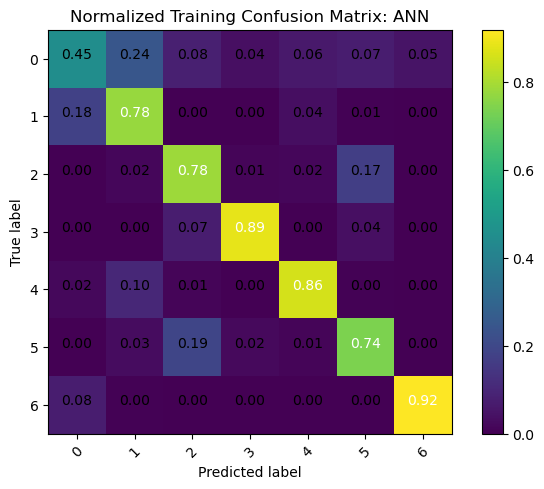

Normalized confusion matrix


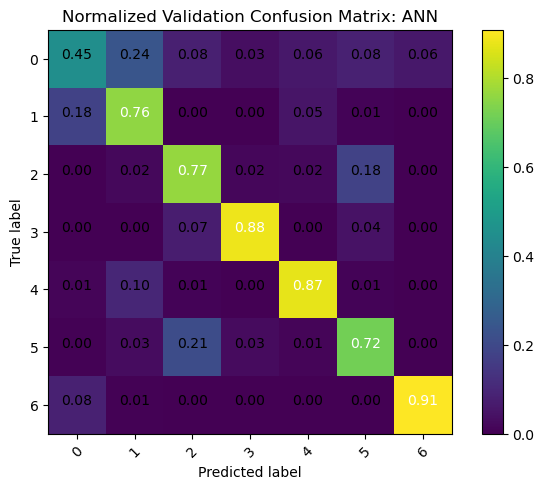

In [10]:
plot_confusion_matrix(all_conf_ANN_tr, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized Training Confusion Matrix: ANN')

plot_confusion_matrix(all_conf_ANN_va, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized Validation Confusion Matrix: ANN')

Normalized confusion matrix


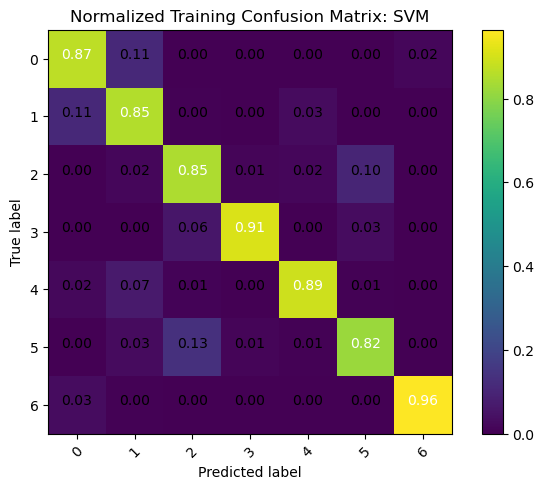

Normalized confusion matrix


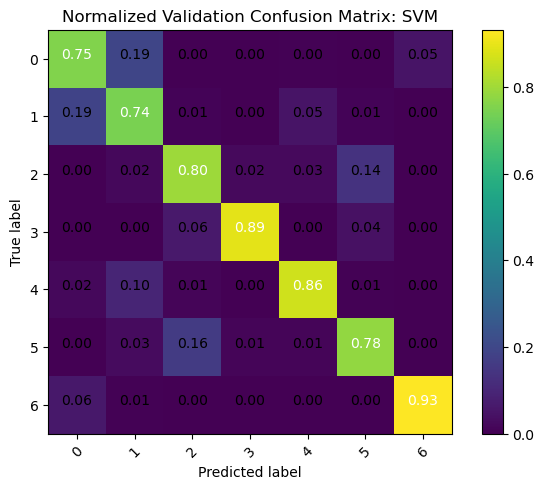

In [11]:
plot_confusion_matrix(all_conf_SVM_tr, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized Training Confusion Matrix: SVM')

plot_confusion_matrix(all_conf_SVM_va, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized Validation Confusion Matrix: SVM')

### Precision, Recall, F1, Accuracy, and Standard Deviations

In [12]:
print(str(n_iter) + ' Runs of Randomly Undersampled Shuffled Data')
print('')
#display table
print('ANN Results')
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))
print('Accuracy of ANN is ' + str(round(accuracy_all_ann_avg, 2)) + ' with standard deviation of ' + str(round(accuracy_all_ann_std,3)))
print('')
#display table
print('SVM Results')
print(tabulate(data_svm, headers=col_names_svm, tablefmt="fancy_grid"))
print('Accuracy of SVM is ' + str(round(accuracy_all_svm_avg, 2)) + ' with standard deviation of ' + str(round(accuracy_all_svm_std, 3)))

2 Runs of Randomly Undersampled Shuffled Data

ANN Results
╒═════════╤═════════════╤═════════════════╤══════════╤══════════════╤══════════╤═════════════╕
│   Class │   Precision │   Std Precision │   Recall │   Std Recall │       F1 │      Std F1 │
╞═════════╪═════════════╪═════════════════╪══════════╪══════════════╪══════════╪═════════════╡
│       1 │    0.449973 │     0.025252    │ 0.807584 │   0.0158393  │ 0.57717  │ 0.0167778   │
├─────────┼─────────────┼─────────────────┼──────────┼──────────────┼──────────┼─────────────┤
│       2 │    0.760034 │     0.00768272  │ 0.40964  │   0.0563793  │ 0.529705 │ 0.0458343   │
├─────────┼─────────────┼─────────────────┼──────────┼──────────────┼──────────┼─────────────┤
│       3 │    0.766702 │     0.000635485 │ 0.578013 │   0.0312236  │ 0.658662 │ 0.0205461   │
├─────────┼─────────────┼─────────────────┼──────────┼──────────────┼──────────┼─────────────┤
│       4 │    0.884499 │     0.00927343  │ 0.90349  │   0.00971733 │ 0.893793 │ 2.029

## Conclusion

fgdfgfd

# Regression

In [13]:
## Function

# Regression stats plots
def stats_plots(Y_tr, Y_va, Y_tr_pred, Y_va_pred, xlim, ylim, textx, texty, text2x, text2y, title, x_var):
    
    #Statistical information regarding training and validation predictions
    mu = np.mean(Y_tr-Y_tr_pred)
    median = np.median(Y_tr-Y_tr_pred)
    sigma = np.std(Y_tr-Y_tr_pred)

    muv = np.mean(Y_va-Y_va_pred)
    medianv = np.median(Y_va-Y_va_pred)
    sigmav = np.std(Y_va-Y_va_pred)

    textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
    textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)
    
    plt.figure(1)
    plt.plot(Y_tr,Y_tr_pred,'ob')
    plt.plot(Y_va,Y_va_pred,'.r')

    plt.plot(np.arange(xlim,ylim,.1),  np.arange(xlim,ylim,.1),'-k')
    plt.xlabel(str(x_var))
    plt.ylabel('Predicted ' + str(x_var))
    plt.legend(['Training', 'Validation'], loc='best')

    plt.text(textx,texty,textstr, color='b',fontsize=15)
    plt.text(text2x,text2y,textstrv, color='r',fontsize=15)
    plt.title(str(title))

    plt.figure(2)
    plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
    plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
    plt.xlabel('Predicted - real')
    plt.ylabel('Probability (density)')
    plt.legend(loc='upper left')

    plt.figure(3)
    plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
    plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
    plt.xlabel('Y (real)')
    plt.ylabel('Y (predicted) - Y (real)')
    plt.plot([xlim,ylim],[0,0],'y')
    plt.legend(loc='best')


In [14]:
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
print('The shape of the dataframe is ' + str(df_SH.shape))

# Count the existing nans
nan_count = df_SH.isna().sum().sum()
print(nan_count)
df_SH=df_SH.dropna(axis=0)
print('The shape of the dataframe after dropping NaNs is ' + str(df_SH.shape))

df_SH.head()

The shape of the dataframe is (9982, 23)
564
The shape of the dataframe after dropping NaNs is (9642, 23)


,Deployment,Year,Month,Day,Hour,DateTime,10-100Hz,100-1000Hz,1-10kHz,10-24kHz,...,DewPt,RelHum,WindDir,WindSp,Pressure,Ice6km2,Ice19km2,Ice31km2,Ice106km2,Ice
0,1,2015,5,18,15,2015-05-18 15:00:00,86.113543,83.540120,75.726148,65.178992,...,-0.1,70.0,15.0,9.0,101.52,13.5,32.222222,39.478261,31.961039,0.0
1,1,2015,5,18,16,2015-05-18 16:00:00,86.100652,96.371012,89.047766,70.179126,...,0.1,71.0,16.0,12.0,101.53,13.5,32.222222,39.478261,31.961039,0.0
2,1,2015,5,18,17,2015-05-18 17:00:00,69.981675,98.985918,91.915703,65.467056,...,0.6,72.0,15.0,12.0,101.51,13.5,32.222222,39.478261,31.961039,0.0
3,1,2015,5,18,18,2015-05-18 18:00:00,68.305432,97.577544,91.349444,65.249551,...,1.4,73.0,13.0,16.0,101.47,13.5,32.222222,39.478261,31.961039,0.0
4,1,2015,5,18,19,2015-05-18 19:00:00,68.952387,98.386537,91.631783,65.269117,...,1.1,76.0,13.0,24.0,101.44,13.5,32.222222,39.478261,31.961039,0.0


In [15]:
# Drop non necessary columns 
df_SH = df_SH.drop(['Deployment','DateTime', 'Ice'], axis=1)

# Create dataframe for histogram plotting
df_hist = df_SH.drop(['Month', 'Day', 'Year', 'Hour'], axis=1)

# Set Ice Concentration as the target variable
var = ['Ice106km2']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

# Call the split data function
X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

# Print the shape of the split data
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

Index(['Year', 'Month', 'Day', 'Hour', '10-100Hz', '100-1000Hz', '1-10kHz',
       '10-24kHz', '250Hz', '50-1000Hz', 'Temperature', 'DewPt', 'RelHum',
       'WindDir', 'WindSp', 'Pressure', 'Ice6km2', 'Ice19km2', 'Ice31km2'],
      dtype='object')
Index(['Ice106km2'], dtype='object')
training set ==  (7231, 19) (7231,) ,, validation set ==  (2411, 19) (2411,)


## ANN

In [16]:
#ann_pipeline = Pipeline([('ANNreg', MLPRegressor(n_iter_no_change=5, 
#                                                 validation_fraction=0.1, early_stopping=True, max_iter=500, 
#                                                learning_rate='adaptive', solver='adam'))])
            
#params = [{'ANNreg__activation':['relu', 'tanh'], 'ANNreg__hidden_layer_sizes':[(20,20), (20,50)], 
#          'ANNreg__alpha':[0.0001, 1], 'ANNreg__tol':[0.0001, 1]}]

#gs_ann = GridSearchCV(ann_pipeline,
#                      param_grid=params,
#                      scoring='neg_mean_squared_error',
#                      cv=5)

#gs_ann.fit(X_tr_Norm, Y_tr)

#gs_ann.best_params_

In [18]:
reg_ann = MLPRegressor(hidden_layer_sizes=(20,20), n_iter_no_change=5, 
                       validation_fraction=0.1, early_stopping=True, max_iter=500, 
                       activation='tanh', solver='adam', learning_rate='adaptive', alpha=0.0001, tol=0.0001)

reg_ann.fit(X_tr_Norm, Y_tr)

Y_tr_pred_ann = reg_ann.predict(X_tr_Norm)  
Y_va_pred_ann = reg_ann.predict(X_va_Norm)

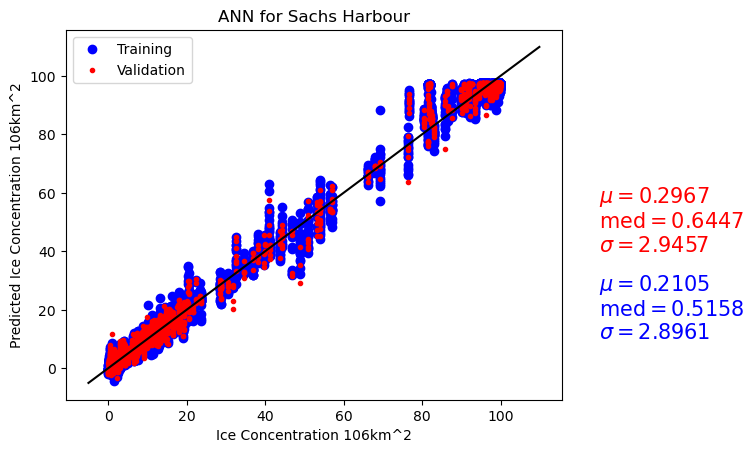

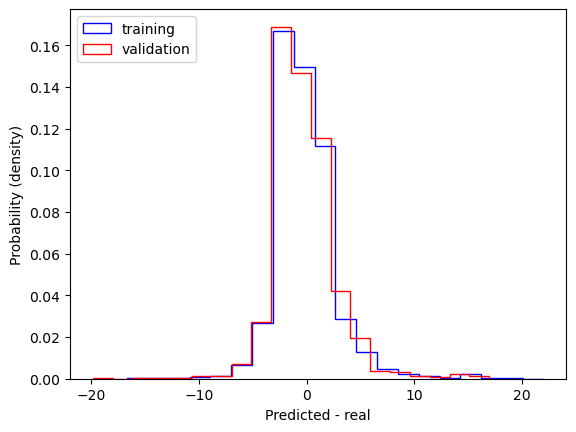

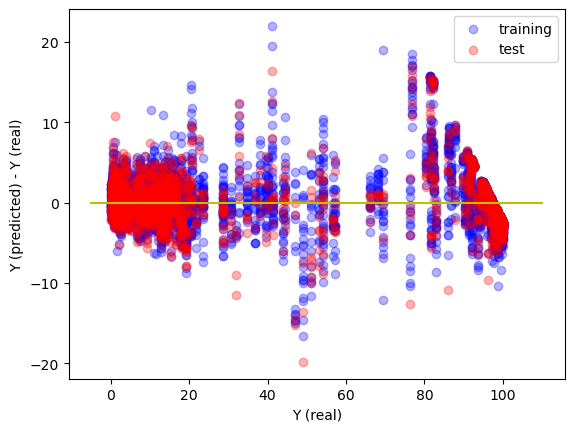

In [19]:
stats_plots(Y_tr, Y_va, Y_tr_pred_ann, Y_va_pred_ann, -5, 110, 125, 10, 125, 40, title='ANN for Sachs Harbour', x_var = 'Ice Concentration 106km^2')

## SVM

In [20]:
# I have done multiple pipeline iterations, determining the things below. 
#svm_pipeline = Pipeline([('svr', SVR(kernel='poly', degree=3, C=5, coef0=1, epsilon=0.001))])
            
#params = [{'svr__gamma':[0.1, 1], 'svr__tol':[0.0001, 0.01], 'svr__epsilon':[0.001, 0.01]}]

#gs_svm = GridSearchCV(svm_pipeline,
#                      param_grid=params,
#                      scoring='neg_mean_squared_error',
#                      cv=5)

#gs_svm.fit(X_tr_Norm, Y_tr)

#gs_svm.best_params_

In [ ]:
clf_svm = SVR(kernel='poly', gamma=0.5, C=6, epsilon=0.001, degree=3, coef0=1, tol=0.01)
clf_svm.fit(X_tr_Norm, Y_tr)
Y_tr_pred = clf_svm.predict(X_tr_Norm)  
Y_va_pred = clf_svm.predict(X_va_Norm)

In [ ]:
stats_plots(Y_tr, Y_va, Y_tr_pred, Y_va_pred, -5, 110, 125, 10, 125, 40, title='SVM for Sachs Harbour', x_var = 'Ice Concentration 106km^2')

## Conclusion

# Conclusion

# References 

**Literature:**

Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

Noble, W. (2006). What is a support vector machine?. Nat Biotechnol 24, 1565–1567 (2006). https://doi.org/10.1038/nbt1206-1565

Suthaharan, S. (2016). Support Vector Machine. In: Machine Learning Models and Algorithms for Big Data Classification. Integrated Series in Information Systems, vol 36. Springer, Boston, MA. https://doi-org.ezproxy.library.uvic.ca/10.1007/978-1-4899-7641-3_9

**Forest Cover Dataset:**
https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

**Sachs Harbour Dataset:** 

Insley, S. J., Halliday, W. D., & de Jong, T. (2017). Seasonal Patterns in Ocean Ambient Noise near Sachs Harbour, Northwest Territories. Arctic, 70(3), 239–248. https://doi.org/10.14430/arctic4662

**Scikit-Learn Documentation:**

https://scikit-learn.org/stable/modules/svm.html#svm-regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html